# Laboratorio 4 - Práctica 2
### Gonzalo de las Heras de Matías - Jorge de la Fuente Tagarro
## Cómo expandir artículos

![title](Images/blog.jpg)
### Objetivo 

El blog sobre Machine Learning https://machinelearningmastery.com/ quiere saber qué características han de
tener sus posts para que luego estos sean compartidos lo máximo posible por sus lectores. Para ello tiene
información sobre posts anteriores. La información se encuentra en el archivo artículos.csv y está compuesta
por: número de palabras, número de links a otras páginas, número de comentarios de usuarios, cantidad de
contenido multimedia (videos, fotografías, etc), días desde que se publicó y número de veces que se ha
compartido.

### Cuestiones 

<ol type="o">
  <li> Encuentra un modelo para dicho set de datos. Haz una interpretación de él. Por último, dibújalo
si es posible teniendo en cuenta las variables más influyentes. </li>
  <li>Haz un análisis de residuos del modelo lo más exhaustivo posible.</li>
  <li>Utiliza los intervalos de confianza para obtener la mayor información posible con ellos.</li>
</ol>

#### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from pylab import *
from scipy.stats import pearsonr
from scipy.stats import sem, t
from scipy import mean
warnings.filterwarnings('ignore')

#### Funciones

In [2]:
def CalcularIntervalos(Confianza, y_val, x_val):
    n = len(y_val)
    m = mean(x_val)
    std_err = sem(x_val)
    h = std_err * t.ppf((1 + Confianza) / 2, n - 1)
    comienzo = m - h
    fin = m + h
    return comienzo, fin

#### Dirección del dataset

In [3]:
DIR_BASE_DATASET = "Datos/articulos.csv"

## 1. Preparación del dataset

In [4]:
Datos = pd.read_csv(DIR_BASE_DATASET)
print("Hay", len(Datos), "registros.")
nulos = pd.DataFrame(Datos.isnull().sum(), columns=["Número de nulos"])
nulos

Hay 160 registros.


,Número de nulos
palabras,0
links,0
comentarios,32
multimedia,0
días,0
compartido,0


In [5]:
Datos = Datos.fillna(0)
Datos.head()

,palabras,links,comentarios,multimedia,días,compartido
0,1742,9,0.0,9,5,25000
1,962,6,0.0,1,10,42000
2,1221,3,0.0,2,68,200000
3,2039,1,104.0,4,131,200000
4,761,0,0.0,1,14,21000


In [6]:
Datos_centrados = Datos[:]
Datos_centrados.head()

,palabras,links,comentarios,multimedia,días,compartido
0,1742,9,0.0,9,5,25000
1,962,6,0.0,1,10,42000
2,1221,3,0.0,2,68,200000
3,2039,1,104.0,4,131,200000
4,761,0,0.0,1,14,21000


<font color="blue">Centramos los datos para poder compararlos.</font>

In [7]:
# Centralización de la columna "palabras".
scaler_palabras = StandardScaler()
Datos_centrados["palabras"] = scaler_palabras.fit_transform(Datos_centrados["palabras"].values.reshape(-1, 1))

# Centralización de la columna "links".
scaler_links = StandardScaler()
Datos_centrados["links"] = scaler_links.fit_transform(Datos_centrados["links"].values.reshape(-1, 1))

# Centralización de la columna "comentarios".
scaler_comentarios = StandardScaler()
Datos_centrados["comentarios"] = scaler_comentarios.fit_transform(Datos_centrados["comentarios"].values.reshape(-1, 1))

# Centralización de la columna "multimedia".
scaler_multimedia = StandardScaler()
Datos_centrados["multimedia"] = scaler_multimedia.fit_transform(Datos_centrados["multimedia"].values.reshape(-1, 1))

# Centralización de la columna "días".
scaler_dias = StandardScaler()
Datos_centrados["días"] = scaler_dias.fit_transform(Datos_centrados["días"].values.reshape(-1, 1))

# Centralización de la columna "compartido".
scaler_y = StandardScaler()
Datos_centrados["compartido"] = scaler_y.fit_transform(Datos_centrados["compartido"].values.reshape(-1, 1))

Datos_centrados.head()

,palabras,links,comentarios,multimedia,días,compartido
0,-0.057590,-0.016793,-0.576414,1.557138,-0.818783,-0.045453
1,-0.740661,-0.080263,-0.576414,-0.784973,-0.775010,0.367090
2,-0.513847,-0.143733,-0.576414,-0.492209,-0.267237,4.201310
3,0.202502,-0.186046,7.904160,0.093319,0.284309,4.201310
4,-0.916683,-0.207203,-0.576414,-0.784973,-0.739991,-0.142522


<font color="blue">Separamos entre variables para predecir y valor esperado.</font>

In [8]:
compartido = Datos_centrados["compartido"].values

del Datos_centrados["compartido"]

datos_entrada = Datos_centrados.values

## 2. Creación del modelo

<font color="blue">Buscamos el mejor modelo reduciendo el error cuadrático medio.</font>

In [9]:
terminado = False

# Buscamos el mejor modelo.
while terminado is False:
    
    # Separamos entre conjunto de entrenamiento y validación.
    x_entrenam, x_val, y_entrenam, y_val = train_test_split(datos_entrada, compartido, test_size=0.2)
    
    # Creación del modelo.
    modelo = LinearRegression()
    
    # Entrenamiento del modelo.
    modelo.fit(x_entrenam, y_entrenam)
    
    # Predicción.
    prediccion = modelo.predict(x_val)
    
    # Cálculo del error cuadrático medio.
    error = mean_squared_error(y_val, prediccion)
    
    # Calculamos r^2.
    r_cuadrado = modelo.score(x_val, y_val)
    
    # Si el error cuadrático medio es menor que un umbral, validamos el modelo. También tenemos que comprobar que
    # r^2 sea positivo. Sí que puede ser negativo. 
    # Ver: https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative
    if error < 5 and r_cuadrado > 0 :
        terminado = True

print("Error cuadrático medio: %.2f"% error)

Error cuadrático medio: 0.73


<font color="blue">Calculamos los coeficientes o distintas Betas del modelo.</font>

In [10]:
coeff_df = pd.DataFrame(modelo.coef_, Datos_centrados.columns, columns=['Coeficientes'])  
coeff_df  

,Coeficientes
palabras,0.144751
links,0.238870
comentarios,0.081157
multimedia,-0.025462
días,0.400483


<font color="blue">Las variables más correlacionadas con el número de comparticiones son el número de días del post y el número de links.</font>

<font color="blue">Calculamos el intercepto o Beta_0, el punto de corte con el eje Y.</font>

In [11]:
modelo.intercept_

-0.009272814595494103

<font color="blue">Calculamos las distintas Betas.</font>

In [12]:
betas = []
betas.append(modelo.intercept_)

for index, row in coeff_df.iterrows():
    betas.append(row["Coeficientes"])
betas

[-0.009272814595494103,
 0.14475131174541872,
 0.2388701504367841,
 0.08115742991022812,
 -0.025462174784085547,
 0.400482990219875]

<font color="blue">Dibujamos el modelo con la variable más correlacionada (número de días del post)</font>

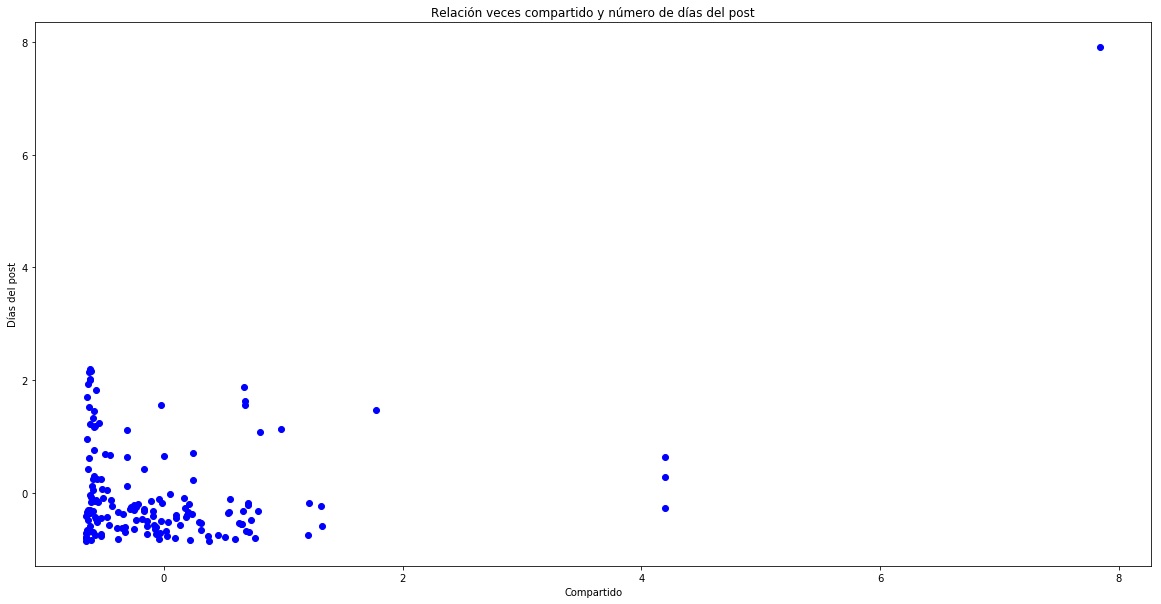

In [13]:
fig, ax1 = subplots(figsize=(20, 10))
plt.scatter(compartido, Datos_centrados["días"], color = 'blue')
plt.title('Relación veces compartido y número de días del post')
plt.xlabel('Compartido')
plt.ylabel('Días del post')
plt.show()

## 3. Análisis de residuos

In [14]:
prediccion = modelo.predict(x_val)
pred = pd.DataFrame()
pred["y_val"] = y_val
pred["prediccion"] = prediccion
pred["error"] = (pred["y_val"] - pred["prediccion"])**2
media = y_val.mean()

pred.head()

,y_val,prediccion,error
0,-0.580351,0.013281,0.352399
1,-0.569625,0.280569,0.722830
2,-0.555841,-0.111937,0.197051
3,-0.610078,-0.465911,0.020784
4,-0.139537,-0.208833,0.004802


### SCT

<font color="blue">Medida de desigualdad.</font>

In [15]:
sct = ((y_val - media)**2).sum()
sct

26.0553098630373

### SCE

<font color="blue">Valor achacable a las variables empleadas para predecir en el modelo.</font>

In [16]:
sce = ((y_val - prediccion)**2).sum()
sce

23.40542906068228

### SCR

<font color="blue">Variación no explicada por las variables exógenas.</font>

In [17]:
scr = ((prediccion - media)**2).sum()
scr

3.49159230356921

### R cuadrado

In [18]:
print("El ajuste es del ", (sce/sct))

El ajuste es del  0.8982978588132545


<font color="blue">Bondad de ajuste muy alta. El modelo es cosistente, relaciona bien las variables del modelo con la predicción.</font>

## 4. Intervalos de confianza

<font color="blue">Establecemos como confianza un 90%.</font>

In [19]:
resultado = CalcularIntervalos(0.90, y_val, x_val)
intervalos = pd.DataFrame()
intervalos["Caracteristica"] = Datos_centrados.columns
intervalos["Inicio"] = resultado[0]
intervalos["Fin"] = resultado[1]
intervalos

,Caracteristica,Inicio,Fin
0,palabras,-0.241375,0.375348
1,links,0.000862,0.133111
2,comentarios,-0.380121,0.514094
3,multimedia,-0.286085,0.420058
4,días,-0.142003,0.275976


<font color="blue">Tenemos que:
<ul>
    <li>La variable "palabras" no influye en la predicción al encontrarse el valor 0 en el intervalo.</li>
    <li>La variable "links" influye en la predicción al no encontrarse el valor 0 en el intervalo.</li>
    <li>La variable "comentarios" no influye en la predicción al encontrarse el valor 0 en el intervalo.</li>
    <li>La variable "multimedia" no influye en la predicción al encontrarse el valor 0 en el intervalo.</li>
    <li>La variable "días" no influye en la predicción al encontrarse el valor 0 en el intervalo.</li>
</ul>
</font>

## Referencias

<ul>
    <li>https://kite.com/python/examples/702/scipy-compute-a-confidence-interval-from-a-dataset</li>
    <li>https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</li>
    <li>https://stackoverflow.com/questions/17203403/student-t-confidence-interval-in-python</li>
    <li>Apuntes de la asignatura</li>
</ul>